In [1]:
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Arial'
import matplotlib as mpl
import pandas as pd
import numpy as np
from iminuit import Minuit
from scipy import stats
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
import os, sys
sys.path.append('..')
from Functions import *
from ExternalFunctions import Chi2Regression, BinnedLH, UnbinnedLH, nice_string_output, add_text_to_ax

In [2]:
path = '../../../KU/Bachelor+Research/Data/Axetris/Own setup/'

leak_test = read_data_leak(path)

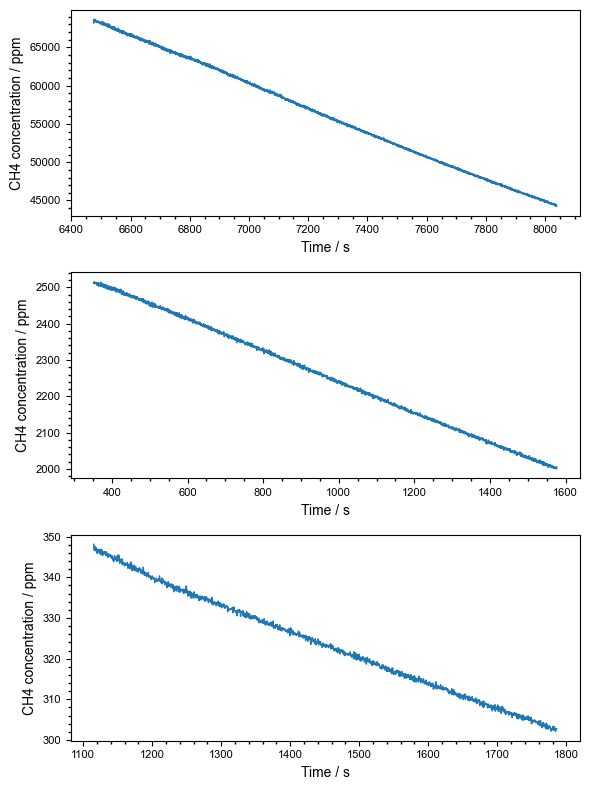

In [3]:
fig, ax = plt.subplots(3,1, figsize = (6, 8))

overview_plot_axetris(ax[0], leak_test['Leak_test1_05032024'][4400:7600])
overview_plot_axetris(ax[1], leak_test['Leak_test2_05032024'][700:4356])
overview_plot_axetris(ax[2], leak_test['Leak_test3_07032024'][1300:])

fig.tight_layout()
fig.savefig('leak_test.png', dpi = 600)
plt.show()

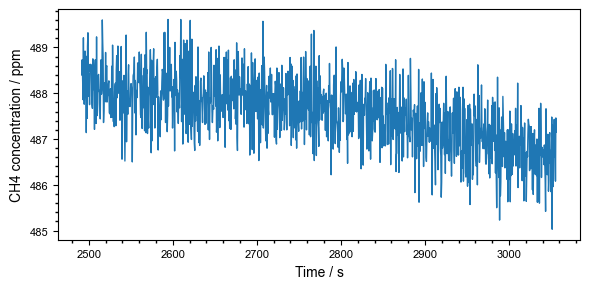

In [4]:
fig, ax = plt.subplots(figsize = (6, 3))

overview_plot_axetris(ax, leak_test['Leak_test4_19032024'][3200:-1])

fig.tight_layout()
fig.savefig('leak_test4.png', dpi = 600)
plt.show()

In [5]:
def dict_for_treatment(data_dict, idx_array, new_keys):
    new_dict = {}
    for i, key in enumerate(data_dict.keys()):
        for j, idx in enumerate(idx_array[i][::2]):
            new_df = data_dict[key].iloc[idx:idx_array[i][j*2+1], :]
            new_df.reset_index(drop=True, inplace=True)
            new_df['Minutes'] = new_df['Seconds'] / 60
            new_dict[new_keys[i][j]] = new_df
    return new_dict

In [6]:
idx_leak = np.array([[4400, 7600], [700, -1], [1300, -1], [3200, -1]])
keys_leak = [['Leak test1'], ['Leak test2'], ['Leak test3'], ['Leak test4']]

pd.options.mode.chained_assignment = None 
leak_treat = dict_for_treatment(leak_test, idx_leak, keys_leak)

for key in leak_treat.keys():
    leak_treat[key]['Seconds'] = leak_treat[key]['Seconds'] - leak_treat[key]['Seconds'][0]
    leak_treat[key]['Minutes'] = leak_treat[key]['Minutes'] - leak_treat[key]['Minutes'][0]

print(leak_treat.keys())
# display(leak_treat['Leak test1'])

dict_keys(['Leak test1', 'Leak test2', 'Leak test3', 'Leak test4'])


In [7]:
a_guess = [-1, -1, -1, -1]
b_guess = [65000, 2000, 300, 400]
array_a, array_b, array_ea, array_eb, array_Chi2, array_ndf, array_Prob = fit_exp(leak_treat, a_guess, b_guess)

Leak test1  Fit: a=-0.016749+-0.00001053  b=69407.175+-9.787  p=0.000000
Leak test2  Fit: a=-0.011281+-0.00037635  b=2526.749+-10.555  p=1.000000
Leak test3  Fit: a=-0.012099+-0.00647119  b=346.064+-13.952  p=1.000000
Leak test4  Fit: a=-0.000330+-0.00554739  b=488.319+-14.707  p=1.000000


In [8]:
print(leak_treat.keys())

dict_keys(['Leak test1', 'Leak test2', 'Leak test3', 'Leak test4'])


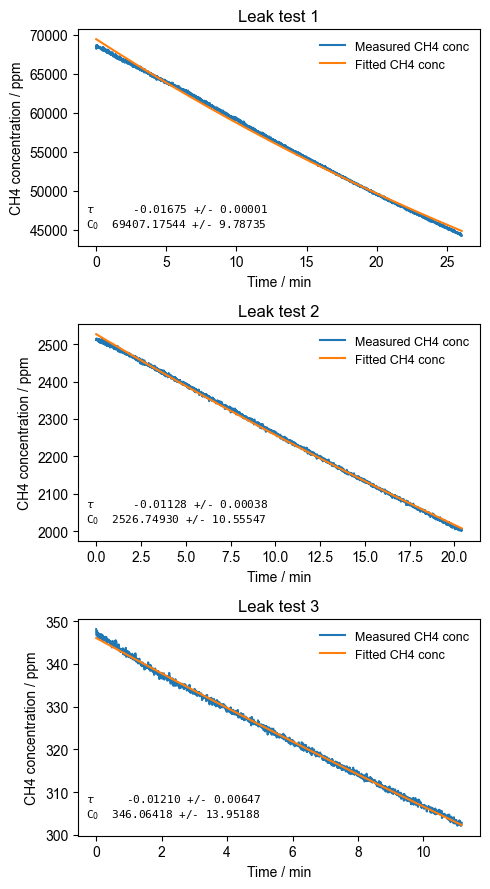

In [9]:
fig, ax = plt.subplots(3, 1, figsize = (5, 9))

for i, key in enumerate(leak_treat.keys()):
    if i < 3:
        plot_fit_axetris(ax[i], leak_treat[key], array_a[i], array_b[i], array_ea[i], array_eb[i], array_Chi2[i], array_ndf[i], array_Prob[i])
ax[0].set_title('Leak test 1')
ax[1].set_title('Leak test 2')
ax[2].set_title('Leak test 3')

fig.tight_layout()
fig.savefig('Fitted_leak.png', dpi = 600)
plt.show()

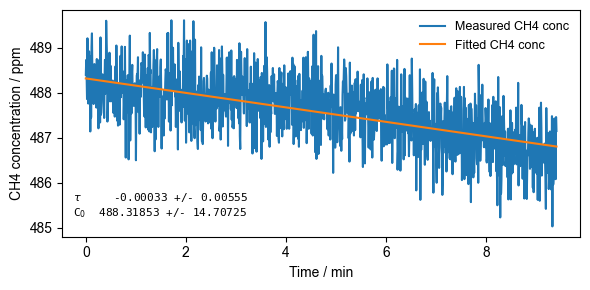

In [10]:
fig, ax = plt.subplots(figsize = (6, 3))

plot_fit_axetris(ax, leak_treat['Leak test4'], array_a[3], array_b[3], array_ea[3], array_eb[3], array_Chi2[3], array_ndf[3], array_Prob[3])

fig.tight_layout()
fig.savefig('Fitted_leak4.png', dpi = 600)
plt.show()